# Kits23 Full Dataset

In [ ]:
# !git clone https://github.com/neheller/kits23
# os.chdir("/content/drive/MyDrive/kits23")
# !pip3 install -e .
# !kits23_download_data

# Pip install Dependencies

In [4]:
!pip3 install batchgenerators
!pip3 install nnunetv2
# !pip3 install --upgrade git+https://github.com/FabianIsensee/hiddenlayer.git

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.7/61.7 kB 3.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.4/96.4 kB 7.9 MB/s eta 0:00:00
  Created wheel for batchgenerators: filename=batchgenerators-0.25-py3-none-any.whl size=89008 sha256=bd6a8068ee6fdabb3660850b445875a8b5e4e1d3604d3505f6c422f3f2de4068
  Stored in directory: /root/.cache/pip/wheels/9e/b0/1b/40912fb58eb167b86cbc444ddb2e6ba382b248215295f932e2
Successfully built batchgenerators


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.2/178.2 kB 5.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.6/52.6 MB 44.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.3/37.3 MB 49.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 85.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 85.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 101.4 MB/s eta 0:00:00
  Using cached argparse-1.4.0-py2.py3-none-any.whl (23 kB)
  Created wheel for nnunetv2: filename=nnunetv2-2.2-py3-none-any.whl size=235949 sha256=38b2e7923945f2c88be5d379599840db3573d422fbae4707adfbbaf3fd32e59a
  Stored 

# Import Libraries

In [5]:
from google.colab import drive
import nnunetv2
import batchgenerators

import torch
# import hiddenlayer

import os
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt

In [6]:
torch.cuda.is_available()

False

In [3]:
!nvidia-smi

Sun Oct  8 05:27:15 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA A100-SXM...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   31C    P0    49W / 400W |      0MiB / 40960MiB |      0%      Default |
|                               |                      |             Disabled |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## Drive Mount

In [2]:
drive.mount("/content/drive")

Mounted at /content/drive


# Set Environment Parameters
Should include steps on how to set up directories for nn-UNet

In [3]:
os.environ['nnUNet_raw'] = "/content/drive/MyDrive/nnUNetFrame/dataset/nnUNet_raw/nnUNet_raw_data"
os.environ['nnUNet_preprocessed'] = "/content/drive/MyDrive/nnUNetFrame/dataset/nnUNet_preprocessed"
os.environ["nnUNet_results"] = "/content/drive/MyDrive/nnUNetFrame/dataset/nnUNet_trained_models"

# Automate Directories for Kits23 in nn-UNet Framework

In [ ]:
# !python3 "/content/drive/MyDrive/nnUNetFrame/nnUNet/nnunetv2/dataset_conversion/Dataset220_KiTS2023.py" "/content/drive/MyDrive/kits23/dataset"

In [ ]:
train_image_dir = "/content/drive/MyDrive/nnUNetFrame/dataset/nnUNet_raw/nnUNet_raw_data/Dataset220_KiTS2023/imagesTr"
train_label_dir = "/content/drive/MyDrive/nnUNetFrame/dataset/nnUNet_raw/nnUNet_raw_data/Dataset220_KiTS2023/labelsTr"
train_files = os.listdir(train_image_dir)
label_files = os.listdir(train_label_dir)
print("train image files:",len(train_files))
print("train label files:",len(label_files))
print("Matches:",len(set(train_files).intersection(set(label_files))))

train image files: 150
train label files: 150
Matches: 0


(602, 512, 512) (602, 512, 512)


IndexError: ignored

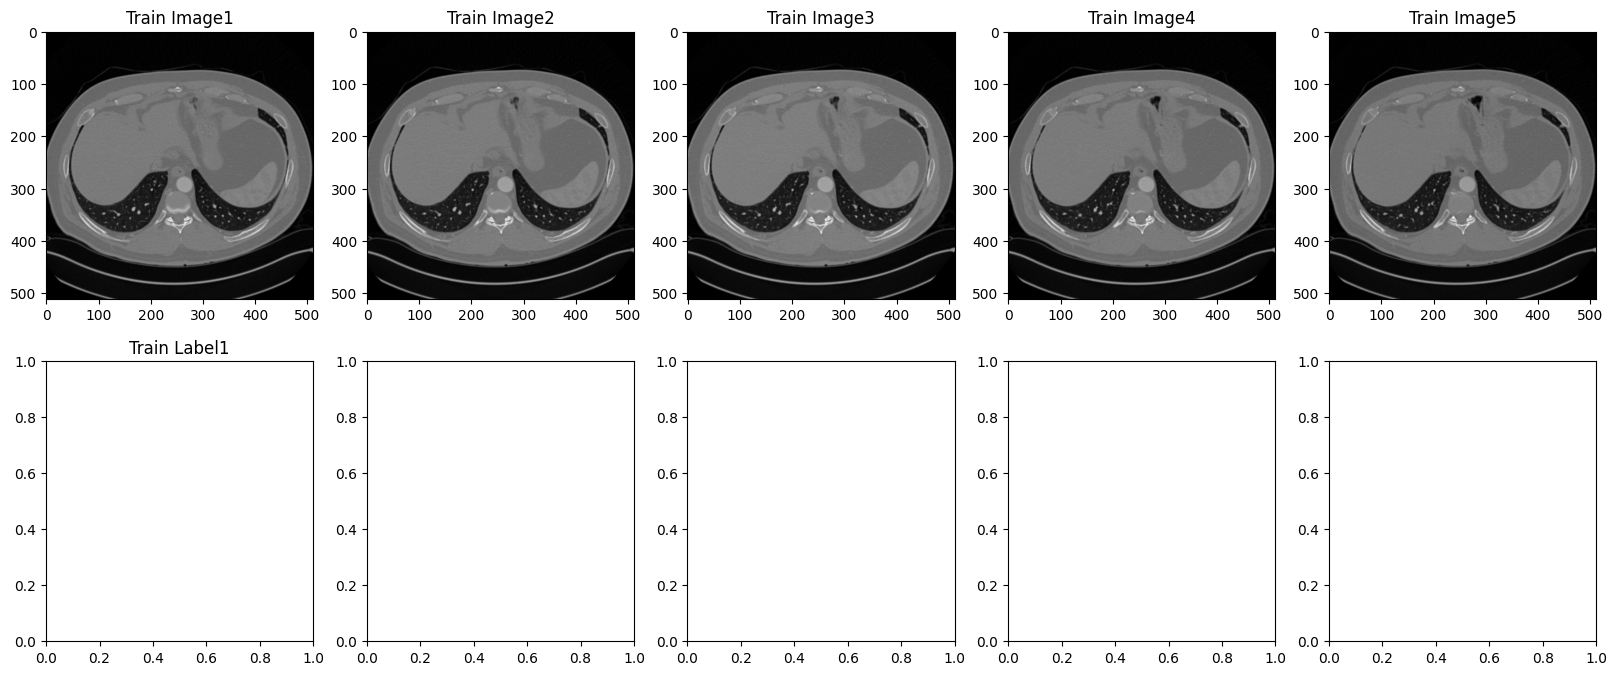

In [ ]:
train_img_name = os.listdir(train_image_dir)[np.random.randint(0,38)]
train_img = np.array(nib.load(os.path.join(train_image_dir,train_img_name)).dataobj)
train_label_name = train_img_name[:train_img_name.find('_0000.nii.gz')]+'.nii.gz'
train_label = np.array(nib.load(os.path.join(train_label_dir,train_label_name)).dataobj)

print(train_img.shape,train_label.shape)

max_rows = 2
max_cols = 5

fig, axes = plt.subplots(nrows=max_rows, ncols=max_cols, figsize=(20,8))
for idx in range(max_cols):
    axes[0, idx].axis("on")
    axes[0, idx].set_title('Train Image'+str(idx+1))
    axes[0, idx].imshow(train_img[idx+2,:,:], cmap="gray")
for idx in range(max_cols):
    axes[1, idx].axis("on")
    axes[1, idx].set_title('Train Label'+str(idx+1))
    axes[1, idx].imshow(train_label[idx+2,:,:])

plt.subplots_adjust(wspace=.2, hspace=.2)
plt.show()

# Verify Dataset Integrity + Obtain Dataset Fingerprint + Plan of Execution

In [ ]:
os.chdir("/content/drive/MyDrive/nnUNetFrame/nnUNet/nnunetv2/experiment_planning")

In [ ]:
# !nnUNetv2_plan_and_preprocess -d 220 --verify_dataset_integrity

In [ ]:
!nnUNetv2_extract_fingerprint -d 220 --verify_dataset_integrity

Dataset220_KiTS2023
Using <class 'nnunetv2.imageio.nibabel_reader_writer.NibabelIOWithReorient'> reader/writer

####################
verify_dataset_integrity Done. 
If you didn't see any error messages then your dataset is most likely OK!
####################



In [ ]:
# !nnUNetv2_preprocess -d 220 -plans_name nnUNetPlans -c 3d_fullres -np 2

Preprocessing dataset Dataset220_KiTS2023
Configuration: 3d_fullres...
100% 489/489 [4:00:24<00:00, 29.50s/it]


# Training 3D-Full-Res Model

In [7]:
os.chdir("/content/drive/MyDrive/nnUNetFrame/nnUNet/nnunetv2/training")

In [ ]:
!nnUNetv2_train -h

In [9]:
!CUDA_VISIBLE_DEVICES=0 nnUNetv2_train 220 3d_fullres 0 -num_gpus 1 -device 'cuda' --npz --c

Using device: cuda:0

#######################################################################
Please cite the following paper when using nnU-Net:
Isensee, F., Jaeger, P. F., Kohl, S. A., Petersen, J., & Maier-Hein, K. H. (2021). nnU-Net: a self-configuring method for deep learning-based biomedical image segmentation. Nature methods, 18(2), 203-211.
#######################################################################


This is the configuration used by this training:
Configuration name: 3d_fullres
 {'data_identifier': 'nnUNetPlans_3d_fullres', 'preprocessor_name': 'DefaultPreprocessor', 'batch_size': 2, 'patch_size': [128, 128, 128], 'median_image_size_in_voxels': [417.0, 512.0, 512.0], 'spacing': [1.0, 0.78125, 0.78125], 'normalization_schemes': ['CTNormalization'], 'use_mask_for_norm': [False], 'UNet_class_name': 'PlainConvUNet', 'UNet_base_num_features': 32, 'n_conv_per_stage_encoder': [2, 2, 2, 2, 2, 2], 'n_conv_per_stage_decoder': [2, 2, 2, 2, 2], 'num_pool_per_axis': [5, 5, 5],

REMEMBER TO USE --npz FLAG!!
- Ensure that GPU's are utilised
- Install HiddenLayers to get Architecture
- Enable checkpoint_best.pth

# Making Inferences

In [ ]:
os.chdir(os.path.join("/content/drive/MyDrive/nnUNetFrame/nnUNet/nnunetv2/inference"))

In [ ]:
!nnUNetv2_predict -i "/content/drive/MyDrive/nnUNetFrame/dataset/nnUNet_raw/nnUNet_raw_data/Dataset220_KiTS2023/imagesTs/" -o "/content/drive/MyDrive/nnUNetFrame/dataset/nnUNet_raw/nnUNet_raw_data/Dataset220_KiTS2023/predictions/" -d 220 -c 3d_fullres -f 0 --save_probabilities

# Visualize Predictions


In [ ]:
seg_file = nib.load("/content/drive/MyDrive/nnUNetFrame/dataset/nnUNet_raw/nnUNet_raw_data/Dataset220_KiTS2023/imagesTs/case_00560_0000.nii.gz").get_fdata()

In [ ]:
seg_file.shape

(484, 512, 512)

In [ ]:
pred_file = nib.load("/content/drive/MyDrive/nnUNetFrame/dataset/nnUNet_raw/nnUNet_raw_data/Dataset220_KiTS2023/predictions/case_00560.nii.gz").get_fdata()

In [ ]:
pred_file.shape

(484, 512, 512)

In [ ]:
np.unique(pred_file)

array([0., 1., 2., 3.])

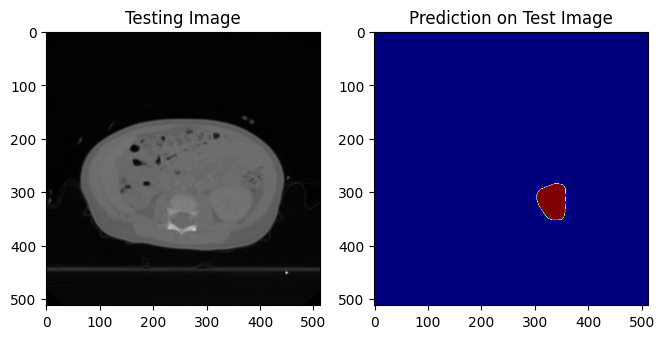

In [ ]:
import matplotlib.pyplot as plt

n_slice = 65
plt.figure(figsize=(12, 8))
plt.subplot(231)
plt.title('Testing Image')
plt.imshow(seg_file[n_slice,:,:], cmap='gray')
plt.subplot(232)
plt.title('Prediction on Test Image')
plt.imshow(pred_file[n_slice,:,:], cmap= "jet")
plt.show()

In [ ]:
def display_slices_with_prediction(ct_volume, prediction_volume, start_slice):
    """
    Display CT slices with associated predictions.

    Parameters:
    - ct_volume: A 3D NumPy array representing the CT volume.
    - prediction_volume: A 3D NumPy array representing the prediction volume.
    - start_slice: The starting slice position for display (default is 0).
    """
    num_slices = ct_volume.shape[0]
    end_slice = min(start_slice + 5, num_slices)

    plt.figure(figsize=(50, 50))

    for i in range(start_slice, end_slice):
        plt.subplot(6, 2, 2 * (i - start_slice) + 1)
        plt.imshow(ct_volume[i, :, :], cmap='gray')
        plt.title(f'CT Slice {i}')
        plt.axis('off')

        plt.subplot(6, 2, 2 * (i - start_slice) + 2)
        plt.imshow(prediction_volume[i, :, :], cmap='jet')  # Adjust cmap as needed
        plt.title(f'Prediction Slice {i}')
        plt.axis('off')

    plt.tight_layout()
    plt.show()

# Example usage:
display_slices_with_prediction(seg_file, pred_file, )



Output hidden; open in https://colab.research.google.com to view.

# Download Model

In [7]:
os.chdir("/content/drive/MyDrive/nnUNetFrame/nnUNet/nnunetv2/model_sharing")

In [22]:
!python3 entry_points.py -h

usage: entry_points.py
       [-h]
       -d
       D
       -o
       O
       [-c C [C ...]]
       [-tr TR]
       [-p P]
       [-f F [F ...]]
       [-chk CHK [CHK ...]]
       [--not_strict]
       [--exp_cv_preds]

Use this to
export a
trained
model as a
zip file.

options:
  -h, --help
    show this
    help
    message and
    exit
  -d D
    Dataset
    name or id
  -o O
    Output file
    name
  -c C [C ...]
    List of con
    figuration
    names
  -tr TR
    Trainer
    class
  -p P
    plans
    identifier
  -f F [F ...]
    list of
    fold ids
  -chk CHK [CHK ...]
    Lis tof
    checkpoint
    names to
    export.
    Default: ch
    eckpoint_fi
    nal.pth
  --not_strict
    Set this to
    allow
    missing
    folds
    and/or conf
    igurations
  --exp_cv_preds
    Set this to
    export the
    cross-
    validation
    predictions
    as well


In [8]:
!python3 entry_points.py -c 3d_fullres -d 220 -chk "checkpoint_best.pth" -f 0 -o "final_model" --not_strict

Configuration 3d_fullres
Exporting fold_0
Traceback (most recent call last):
  File "/content/drive/MyDrive/nnUNetFrame/nnUNet/nnunetv2/model_sharing/entry_points.py", line 67, in <module>
    main()
  File "/content/drive/MyDrive/nnUNetFrame/nnUNet/nnunetv2/model_sharing/entry_points.py", line 64, in main
    export_pretrained_model_entry()
  File "/content/drive/MyDrive/nnUNetFrame/nnUNet/nnunetv2/model_sharing/entry_points.py", line 59, in export_pretrained_model_entry
    export_pretrained_model(dataset_name_or_id=args.d, output_file=args.o, configurations=args.c, trainer=args.tr,
  File "/usr/local/lib/python3.10/dist-packages/nnunetv2/model_sharing/model_export.py", line 62, in export_pretrained_model
    zipf.write(source_file, os.path.relpath(source_file, nnUNet_results))
  File "/usr/lib/python3.10/zipfile.py", line 1741, in write
    zinfo = ZipInfo.from_file(filename, arcname,
  File "/usr/lib/python3.10/zipfile.py", line 504, in from_file
    st = os.stat(filename)
FileNotF